# 4.2 Assignment
# DSC 640: Data Presentation and Visualizations
# Wittlieff, Alexa
# 7/31/2022

In [1]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Import datasets
# Load the ppg2008 dataset
df_bb = pd.read_csv(r'C:\Users\Alexa\Documents\GitHub\Wittlieff_Alexa_DSC640_GitHubRepository\4.2 Exercises\ppg2008.csv')
df_bb = df_bb.set_index('Name  ')

df_costco = pd.read_csv(r'C:\Users\Alexa\Documents\GitHub\Wittlieff_Alexa_DSC640_GitHubRepository\4.2 Exercises\costcos-geocoded.csv')

In [3]:
# Verify import success
df_bb.head()

,G,MIN,PTS,FGM,FGA,FGP,FTM,FTA,FTP,3PM,3PA,3PP,ORB,DRB,TRB,AST,STL,BLK,TO,PF
Name,,,,,,,,,,,,,,,,,,,,
Dwyane Wade,79,38.6,30.2,10.8,22.0,0.491,7.5,9.8,0.765,1.1,3.5,0.317,1.1,3.9,5.0,7.5,2.2,1.3,3.4,2.3
LeBron James,81,37.7,28.4,9.7,19.9,0.489,7.3,9.4,0.780,1.6,4.7,0.344,1.3,6.3,7.6,7.2,1.7,1.1,3.0,1.7
Kobe Bryant,82,36.2,26.8,9.8,20.9,0.467,5.9,6.9,0.856,1.4,4.1,0.351,1.1,4.1,5.2,4.9,1.5,0.5,2.6,2.3
Dirk Nowitzki,81,37.7,25.9,9.6,20.0,0.479,6.0,6.7,0.890,0.8,2.1,0.359,1.1,7.3,8.4,2.4,0.8,0.8,1.9,2.2
Danny Granger,67,36.2,25.8,8.5,19.1,0.447,6.0,6.9,0.878,2.7,6.7,0.404,0.7,4.4,5.1,2.7,1.0,1.4,2.5,3.1


In [4]:
# Verify import success
df_costco.head()

,Address,City,State,Zip Code,Latitude,Longitude
0,1205 N. Memorial Parkway,Huntsville,Alabama,35801-5930,34.743095,-86.600955
1,3650 Galleria Circle,Hoover,Alabama,35244-2346,33.377649,-86.812420
2,8251 Eastchase Parkway,Montgomery,Alabama,36117,32.363889,-86.150884
3,5225 Commercial Boulevard,Juneau,Alaska,99801-7210,58.359200,-134.483000
4,330 West Dimond Blvd,Anchorage,Alaska,99515-1950,61.143266,-149.884217


### 1. Heat Map

In [5]:
# Normalize data
df_bb_norm = (df_bb-df_bb.mean())/df_bb.std()

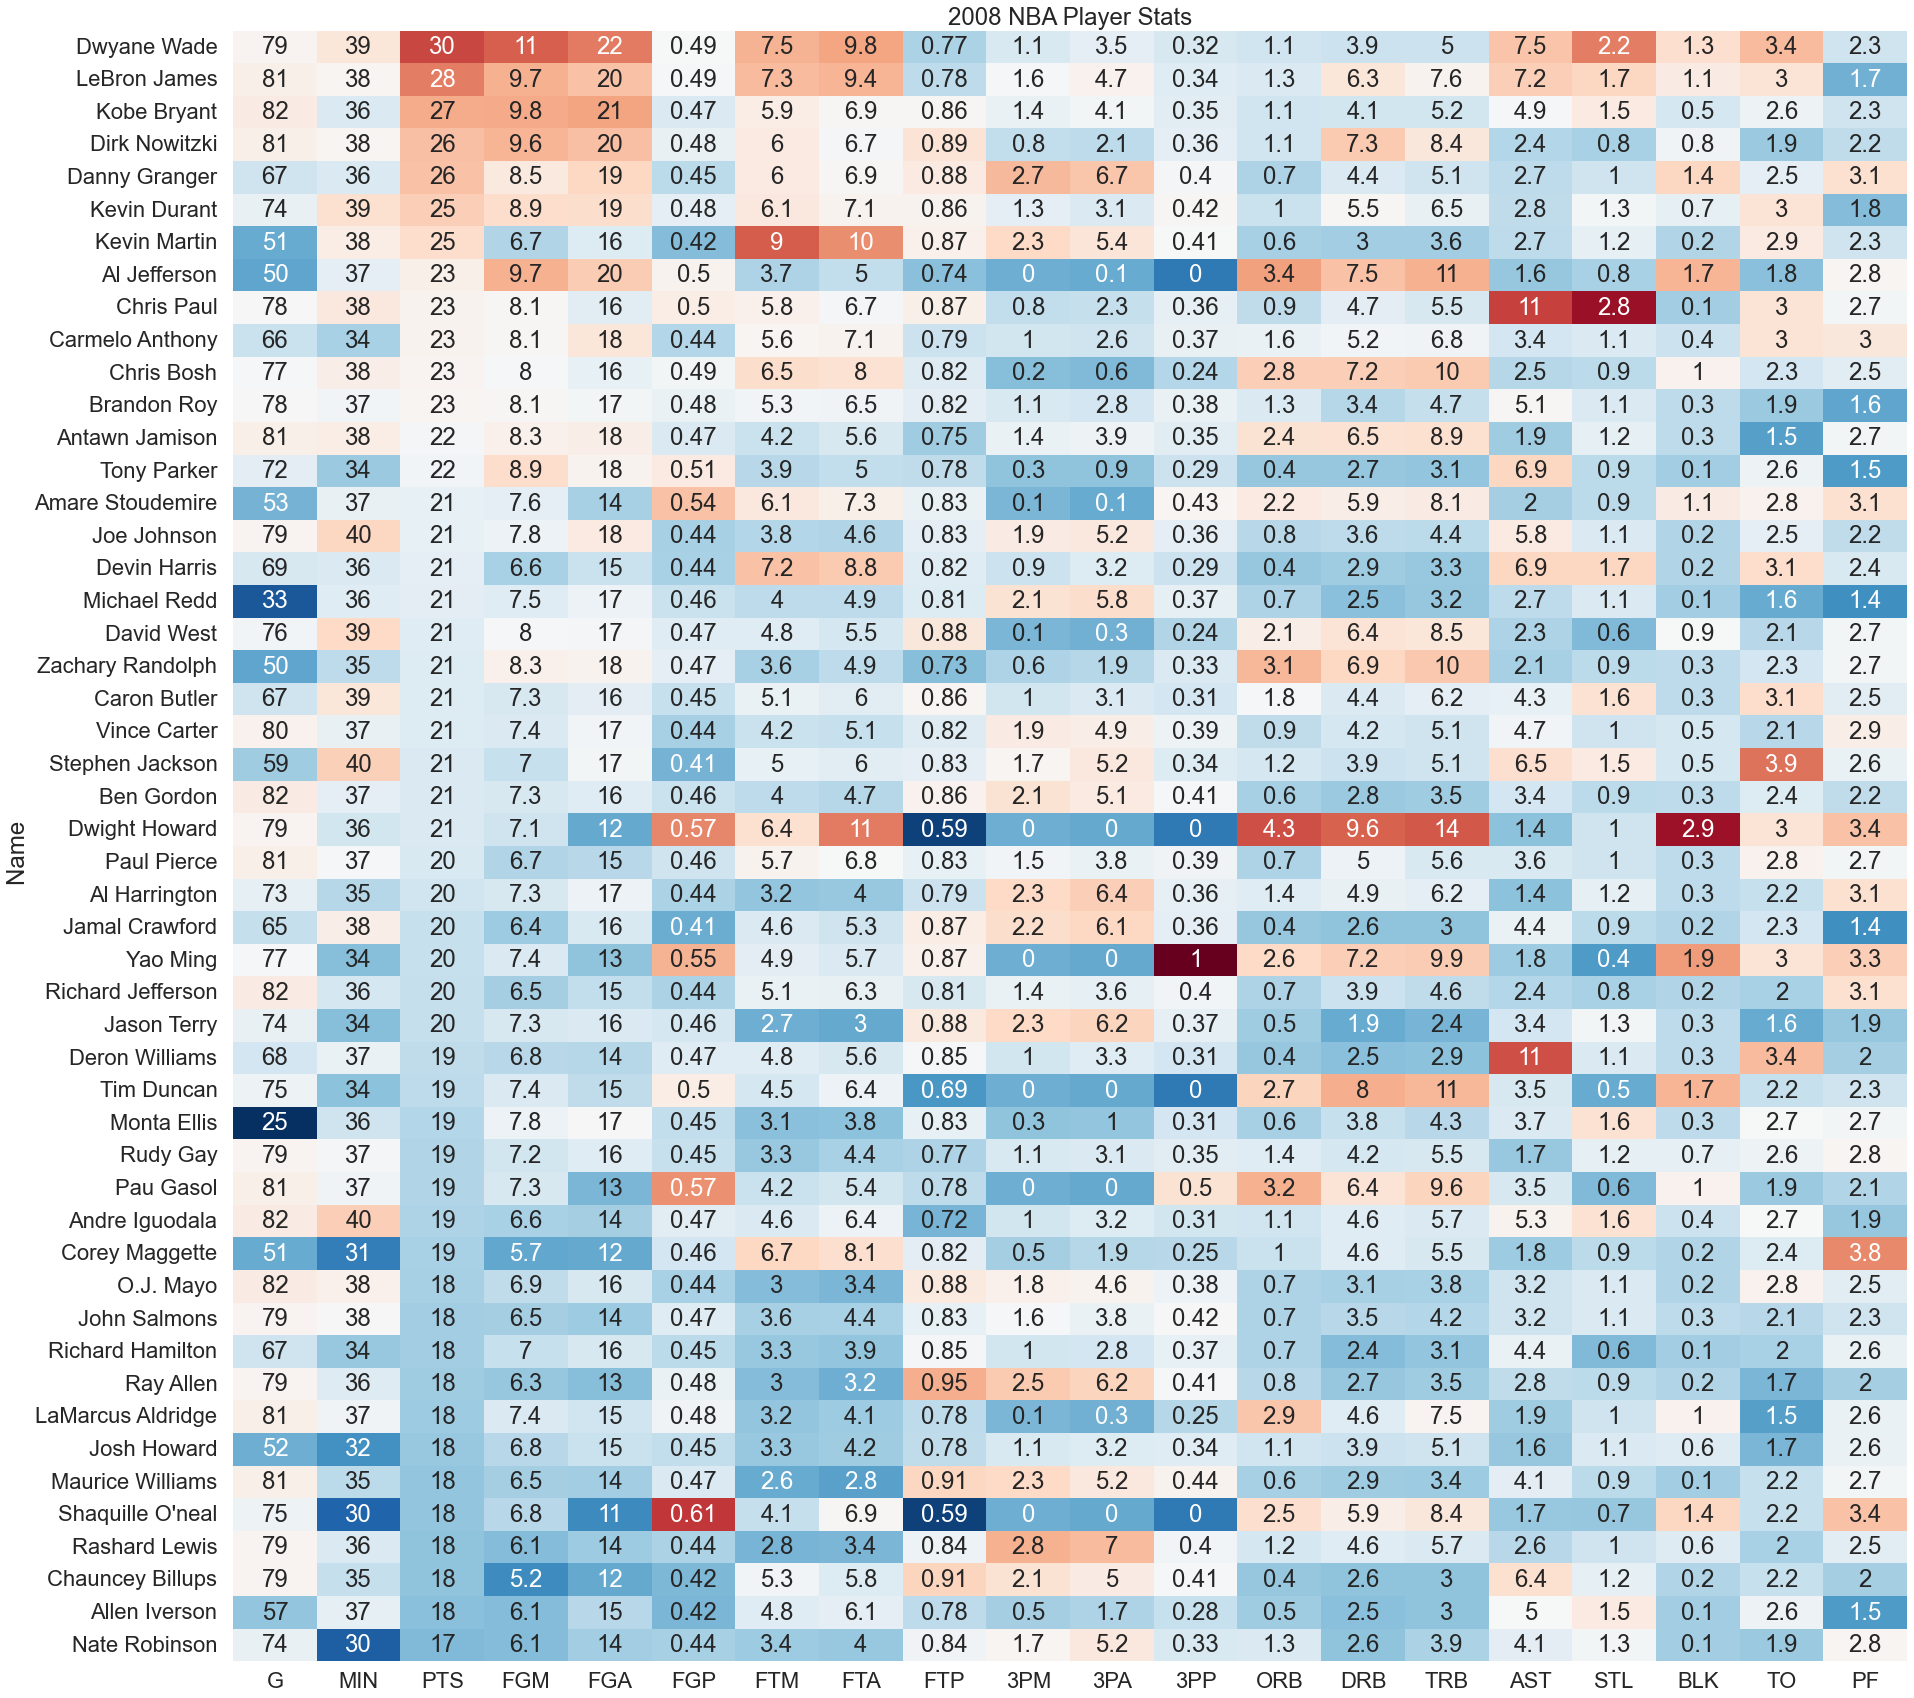

In [6]:
# Build heatmap
sns.set(rc = {'figure.figsize':(30,30)})
sns.set(font_scale = 2)
sns.heatmap(df_bb_norm, cmap="RdBu_r", annot=df_bb, cbar=False).set(title='2008 NBA Player Stats')
plt.show()

### 2. Spatial Chart

In [7]:
# Load library
from mpl_toolkits.basemap import Basemap

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Costco Locations in the U.S.')

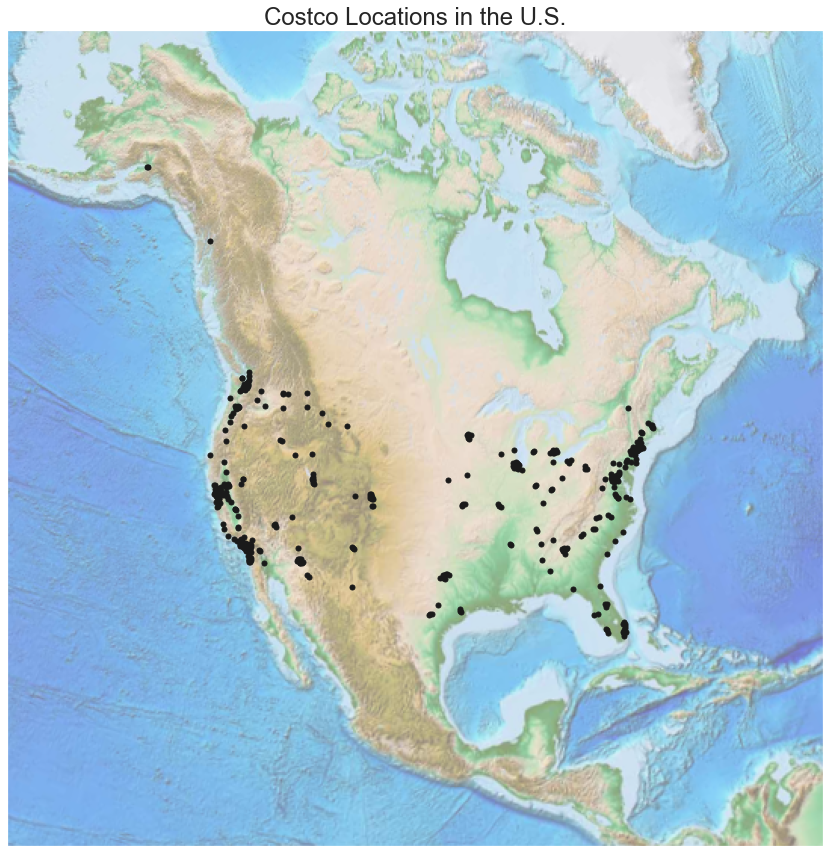

In [19]:
# Create Spatial Chart
fig = plt.figure(figsize=(15,15))
m = Basemap(projection='lcc', resolution=None,
            width=8E6, height=8E6, 
            lat_0=45, lon_0=-100,)
m.etopo(scale=0.5, alpha=0.5)

for index, row in df_costco.iterrows():
    City = row['City']
    Latitude = row['Latitude']
    Longitude = row['Longitude']
    x, y = m(Longitude, Latitude)
    plt.plot(x, y, 'ok', markersize=5)

plt.title('Costco Locations in the U.S.')

### 3. Contour Chart

In [9]:
# Load library
import plotly.express as px

In [29]:
# Create Contour Chart
fig = px.density_contour(df_bb, x='MIN', y='PTS', title='2008 NBA Minutes Vs Points')
fig.update_traces(contours_coloring='heatmap', contours_showlabels = True,colorscale='Hot')
fig.show()